In [2]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [3]:
FREQUENCY=pd.read_csv('data/FREQUENCY.csv')

In [4]:
frequency=pd.read_csv('data/Model Popularity.csv')

In [5]:
FREQUENCY

,Unnamed: 0,Model,Count,FuelEcon,City,Hwy,Combo
0,0,EXPLORER FWD,11311,"[20, 28, 23]",20,28,23
1,1,F150 PICKUP 2WD,9253,"[16, 22, 18]",16,22,18
2,2,FOCUS FWD,7633,"[28, 38, 31]",28,38,31
3,3,MUSTANG,7427,"[19, 31, 23]",19,31,23
4,4,ESCAPE FWD,5721,"[21, 28, 23]",21,28,23
5,5,FUSION AWD,4809,"[17, 25, 19]",17,25,19
6,6,EXPEDITION 2WD FFV,4356,"[14, 20, 16]",14,20,16
7,7,TAURUS AWD,4115,"[17, 26, 20]",17,26,20
8,8,E150 VAN FFV,4115,"[13, 17, 15]",13,17,15
9,9,E250 VAN FFV,2307,"[13, 17, 15]",13,17,15


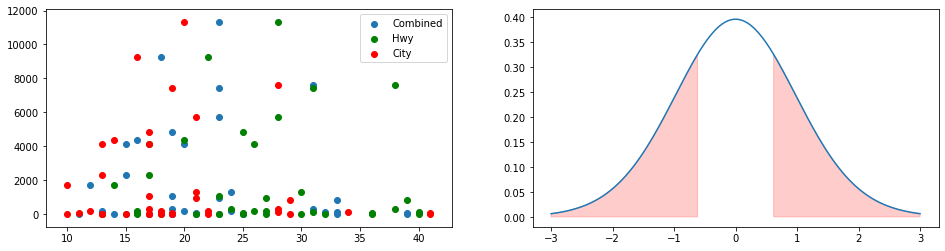

In [22]:
fig,ax= plt.subplots(1,2, figsize=(16,4))

ax[0].scatter(FREQUENCY.Combo,FREQUENCY.Count,label='Combined')
ax[0].scatter(FREQUENCY.Hwy,FREQUENCY.Count,label='Hwy', color='green')
ax[0].scatter(FREQUENCY.City,FREQUENCY.Count,label='City', color='red')
ax[0].legend()
tdistro=stats.t(df=34).pdf(np.linspace(-3,3,200))
x=np.linspace(-3,3,200)
ax[1].plot(np.linspace(-3,3,200),tdistro)
ax[1].fill_between(x, tdistro, 0, 
                where=( (-0.59 >= x) | (x >= 0.59) ), color="red", alpha=0.2)


plt.show()

In [15]:
corr=FREQUENCY.corr()['City']['Count']

res=corr*(34/(1-(corr)**2))**.5
res

-0.5906202354189433

In [16]:
stats.t(df=34).cdf(res)*2

0.5586807335613755

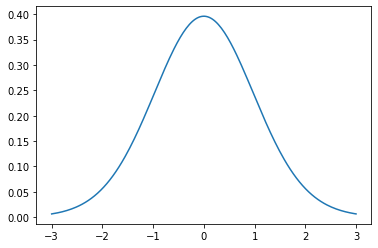

In [17]:
tdistro=stats.t(df=34).pdf(np.linspace(-3,3,200))
plt.plot(np.linspace(-3,3,200),tdistro)
plt.show()

count/sales= countper sale

vio per vic sold vs combined fuel econ

population is traffic ticket violtions 

of the traffic violations as fuel conusmption increases ????? 


normalized for puchase rate there is a a _______ corolation betweent fuel econmy and violation frequency

corolation hypothesis test. tell me that if my r value is less than 

maryland is represntiive

find area to the left of this on bell curve and right of +.59
comes out of a t distribuion with 34 deg of freedom

if that summed area is less than .05 there is evidence to reject the null hypo.

null hypo is that there is a zero corolation

since .55 is more than .05 we do not have enough evidence to reject the null hypo

In [18]:
FREQUENCY['Sales']=pd.Series([171325,605819,95144,61495,203574,119355,40512,21718,18047,10119,7535,98938,68746,1064639,35551,16158,3590,763,4194,23218,4412,1533,4059,2063,1365,967,124,66,7220,6257,393,91,18,1444,50,9])

In [19]:
fn = lambda row: row['Count']/row['Sales']
col = FREQUENCY.apply(fn, axis=1) # get column data with an index
FREQUENCY = FREQUENCY.assign(Normed=col.values) # assign values to column 'c'

In [20]:
FREQUENCY

,Unnamed: 0,Model,Count,FuelEcon,City,Hwy,Combo,Sales,Normed
0,0,EXPLORER FWD,11311,"[20, 28, 23]",20,28,23,171325,0.066021
1,1,F150 PICKUP 2WD,9253,"[16, 22, 18]",16,22,18,605819,0.015274
2,2,FOCUS FWD,7633,"[28, 38, 31]",28,38,31,95144,0.080226
3,3,MUSTANG,7427,"[19, 31, 23]",19,31,23,61495,0.120774
4,4,ESCAPE FWD,5721,"[21, 28, 23]",21,28,23,203574,0.028103
5,5,FUSION AWD,4809,"[17, 25, 19]",17,25,19,119355,0.040292
6,6,EXPEDITION 2WD FFV,4356,"[14, 20, 16]",14,20,16,40512,0.107524
7,7,TAURUS AWD,4115,"[17, 26, 20]",17,26,20,21718,0.189474
8,8,E150 VAN FFV,4115,"[13, 17, 15]",13,17,15,18047,0.228016
9,9,E250 VAN FFV,2307,"[13, 17, 15]",13,17,15,10119,0.227987


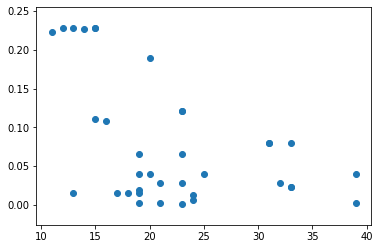

In [24]:
plt.subplots()
plt.scatter(FREQUENCY.Combo,FREQUENCY.Normed,label='Combined')
plt.show()

In [25]:
X = FREQUENCY.Combo.values.reshape(-1, 1)  # values converts it into a numpy array
Y = FREQUENCY.Normed.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

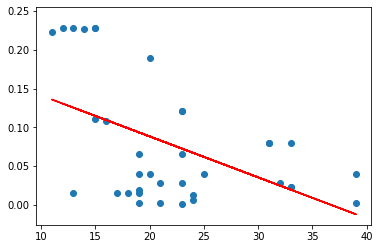

0.24492214575782534

In [26]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
linear_regressor.score(X,Y)

In [27]:
corr=FREQUENCY.corr()['Combo']['Normed']

res=corr*(34/(1-(corr)**2))**.5
res

-3.320913929629245

In [28]:
stats.t(df=34).cdf(res)*2

0.0021514314259223964

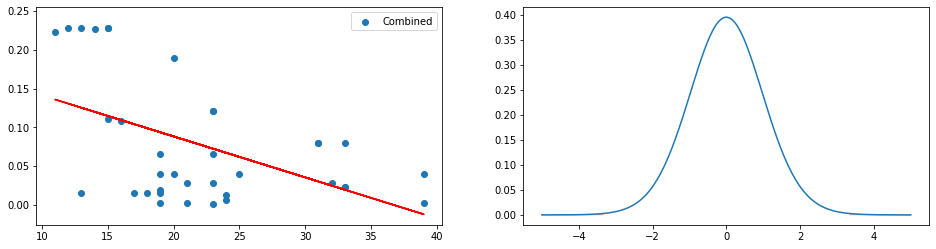

In [30]:
fig,ax= plt.subplots(1,2, figsize=(16,4))

ax[0].scatter(X, Y, label='Combined')
ax[0].plot(X, Y_pred, color='red')
linear_regressor.score(X,Y)
ax[0].legend()
x=np.linspace(-5,5,200)
tdistro=stats.t(df=34).pdf(x)

ax[1].plot(x,tdistro)
ax[1].fill_between(x, tdistro, 0, 
                where=( (res >= x) | (x >= -res) ), color="red", alpha=0.2)


plt.show()

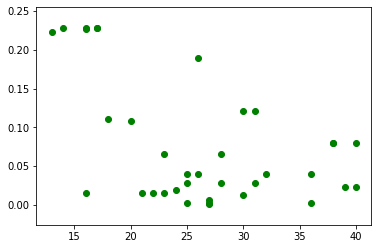

In [45]:
plt.subplots()
plt.scatter(FREQUENCY.Hwy,FREQUENCY.Normed,label='Hwy', color='green')
plt.show()

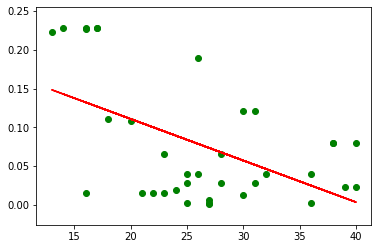

0.27350500231968833

In [82]:
X = FREQUENCY.Hwy.values.reshape(-1, 1)  # values converts it into a numpy array
Y = FREQUENCY.Normed.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y, color='green')
plt.plot(X, Y_pred, color='red')
plt.show()
linear_regressor.score(X,Y)

In [74]:
corr=FREQUENCY.corr()['Hwy']['Normed']

res=corr*(34/(1-(corr)**2))**.5
res

-3.577715325382763

In [75]:
stats.t(df=34).cdf(res)*2

0.001065879042448288

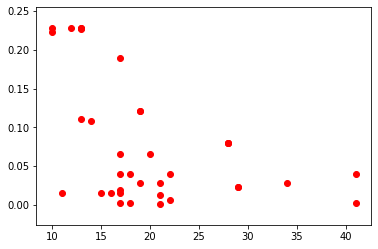

In [46]:
plt.subplots()
plt.scatter(FREQUENCY.City,FREQUENCY.Normed,label='City', color='red')
plt.show()

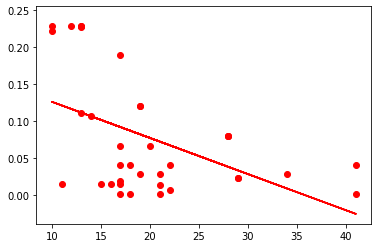

0.22890269912527583

In [79]:
X = FREQUENCY.City.values.reshape(-1, 1)  # values converts it into a numpy array
Y = FREQUENCY.Normed.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y, color='red')
plt.plot(X, Y_pred, color='red')
plt.show()
linear_regressor.score(X,Y)

In [76]:
corr=FREQUENCY.corr()['City']['Normed']

res=corr*(34/(1-(corr)**2))**.5
res

-3.176949591222216

In [77]:
stats.t(df=34).cdf(res)*2

0.00316157795830453